In [90]:
# mengubungkan clab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# memanggil data set lewat gdrive
path ="/content/drive/MyDrive/praktikum_ml/praktikum03"

**MEMBACA FILE CSV**

In [92]:
# membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + "/data/socr.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


**MELIHAT INFORMASI UMUM PADA DATA**

In [93]:
# mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


**MENGHITUNG STATISTIK DESKTIFTIP PADA KOLOM NUMERIC**

In [94]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


**DATA PRE-PROCESSING**

In [95]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "Tinggi_cm",
                     "Weight(Pounds)": "Berat_kg"})
    .assign(
      Tinggi_cm=lambda d: d["Tinggi_cm"] * 2.54,
      Berat_kg=lambda d: d["Berat_kg"] * 0.453592)


.round({"Tinggi_cm": 2, "Berat_kg": 2})
).copy()

df1.head()


,Tinggi_cm,Berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


**MEMBAGI DATASET UNTUK TRAINING DAN TEST**

In [99]:
from sklearn.model_selection import train_test_split

X = df1[["Tinggi_cm"]]
y = df1["Berat_kg"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

X_train.head()

,Tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


**TRAINING MODEL**

In [100]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**EVALUASI MODEL**

In [101]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("koefisien (kg per cm):", model.coef_[0])
print("intercept (kg):       ", model.intercept_)
print("R2 (test):            ", r2)
print("MAE (kg):             ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):            ", rmse)

koefisien (kg per cm): 0.5518217971118468
intercept (kg):        -37.656882325081
R2 (test):             0.24989238901493693
MAE (kg):              3.6704108331736673
RMSE (kg):             4.60900592355825


**PERSAMAAN REGRESI**

In [102]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Persamaan: y = {slope:.3f} * X + {intercept:.3f}")

Persamaan: y = 0.552 * X + -37.657


**PLOT REGRESI**

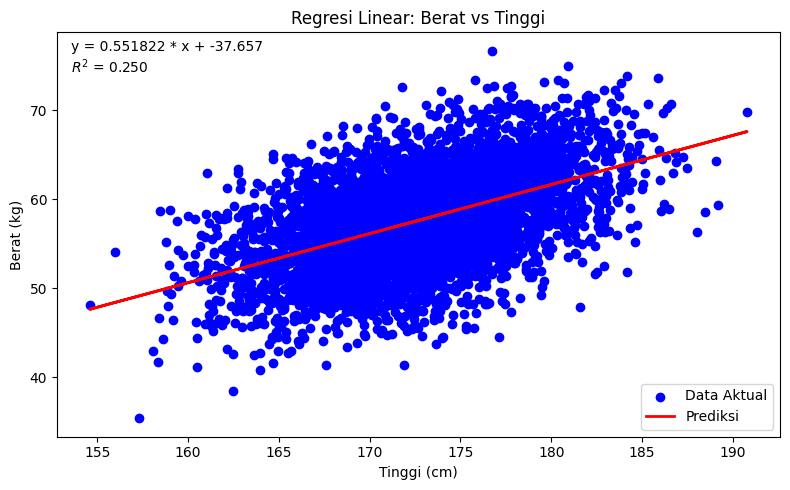

In [103]:
# plot regresi
import matplotlib.pyplot as plt

# plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

# garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)

plt.legend()
plt.tight_layout()
plt.show()

In [104]:
y_pred_test = model.predict(X_test)

#Buat label hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["Tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,

})

#1) selsisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

#2) Akurasi per-baris (100 * (1 - |error|aktual)), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) #antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762940,8.602940,82.849003
1,171.31,50.33,56.875710,6.545710,86.994417
2,169.29,58.22,55.761030,-2.458970,95.776417
3,163.30,58.92,52.455617,-6.464383,89.028542
4,170.52,63.06,56.439771,-6.620229,89.501698
...,...,...,...,...,...
4995,178.75,56.59,60.981264,4.391264,92.240212
4996,163.05,47.45,52.317662,4.867662,89.741493
4997,166.51,52.46,54.226965,1.766965,96.631786
4998,167.70,49.90,54.883633,4.983633,90.012759


**Multiple Linear Regresi**

In [105]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum03/data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [106]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [107]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin": "jk","Umur (bulan)":"Umur_bln",
                        "Tinggi Badan (cm)": "tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())
# laki-laki: 1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,Umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [108]:
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg        jk  Umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
Umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


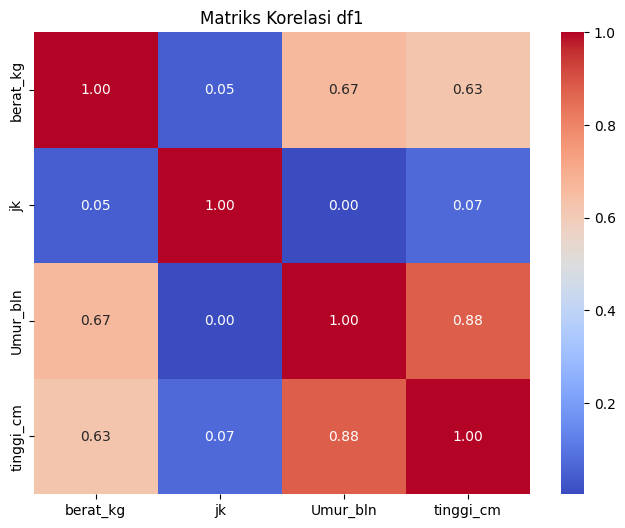

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
y = df1["berat_kg"]
X = df1[["Umur_bln", "tinggi_cm"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

print("jumlah data train  :", len(X_train))
print("jumlah data test   :", len(X_test))

X_train.head()

jumlah data train  : 80000
jumlah data test   : 20000


,Umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


**Pemodelan**

In [111]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,Umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [112]:
import statsmodels.api as sm

# buat model PLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')
const = model.params['const']
x1_umur = model.params['Umur_bln']
x2_tinggi = model.params['tinggi_cm']

# print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f} * x1 + {x2_tinggi:.3f} * x2")

-----------------------------
const        2.545617
Umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
-----------------------------
y = 2.546 + 0.230 * x1 + 0.054 * x2


In [113]:
# tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:18:44   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

**pengujian model dengan data testing**

In [114]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["Umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan) # antisiapsi pembagian nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845


Tugas Praktikum3 Mandiri

In [115]:
import pandas as pd

# read the CSV file with a comma delimeter
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum03/data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               5 non-null      int64  
 1   Nama             5 non-null      object 
 2   tinggi_cm        5 non-null      int64  
 3   actual_berat_kg  5 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 292.0+ bytes


In [117]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [118]:
from sklearn.model_selection import train_test_split
y = df["cnt"]
X = df[["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp","atemp", "hum", "windspeed"]]

# Bagi data jadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7)
X_train.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
548,3,1,7,0,1,1,1,0.781667,0.702038,0.447083,0.195267
115,2,0,4,0,2,1,1,0.631667,0.594083,0.729167,0.326500
272,4,0,9,0,5,1,1,0.564167,0.544829,0.647500,0.206475
65,1,0,3,0,1,1,1,0.261739,0.238461,0.551304,0.341352
232,3,0,8,0,0,0,1,0.710833,0.675525,0.770000,0.248754


**Training model**

In [119]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Koefisien (tiap variabel):")
for col, coef in zip(X.columns, model.coef_):
    print(f"  {col:12}: {coef:.4f}")

print("\nIntercept:", model.intercept_)
print(f"\nR² (test):   {r2:.3f}")
print(f"MAE:         {mae:.3f}")
print(f"RMSE:        {rmse:.3f}")

Koefisien (tiap variabel):
  season      : 534.8619
  yr          : 1995.1210
  mnth        : -37.9804
  holiday     : -428.3209
  weekday     : 52.4222
  workingday  : 153.8245
  weathersit  : -648.6846
  temp        : 2430.9079
  atemp       : 3187.5017
  hum         : -1165.1659
  windspeed   : -2443.7941

Intercept: 1558.6145433422266

R² (test):   0.698
MAE:         770.202
RMSE:        1045.288


In [121]:
# Buat tabel hasil prediksi vs aktual
hasil = pd.DataFrame({
    'Aktual': y_test,
    'Prediksi': y_pred.round(2),
    'Selisih': (y_test - y_pred).round(2)
})
hasil.head()

,Aktual,Prediksi,Selisih
708,3228,4676.50,-1448.50
696,3959,4346.03,-387.03
624,7333,6488.17,844.83
304,4068,4002.38,65.62
333,3613,3347.46,265.54


In [122]:
# Ambil slope (koefisien) dan intercept dari model
intercept = model.intercept_
coef = model.coef_

# Tampilkan persamaan regresi dengan semua variabel X
print("Persamaan Regresi Linear Berganda:")
persamaan = f"cnt = {intercept:.3f}"
for var, c in zip(X.columns, coef):
    persamaan += f" + ({c:.3f} × {var})"
print(persamaan)

Persamaan Regresi Linear Berganda:
cnt = 1558.615 + (534.862 × season) + (1995.121 × yr) + (-37.980 × mnth) + (-428.321 × holiday) + (52.422 × weekday) + (153.824 × workingday) + (-648.685 × weathersit) + (2430.908 × temp) + (3187.502 × atemp) + (-1165.166 × hum) + (-2443.794 × windspeed)


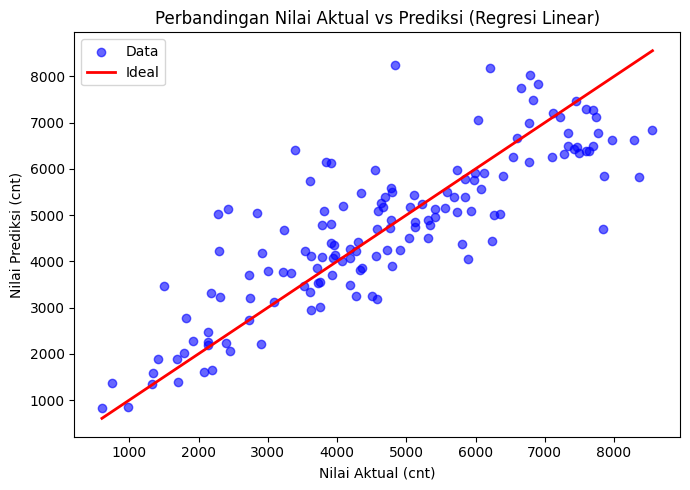

In [123]:
import matplotlib.pyplot as plt

# Scatter antara nilai aktual dan prediksi
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Data')

# Garis ideal (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='-', linewidth=2, label='Ideal')

plt.xlabel("Nilai Aktual (cnt)")
plt.ylabel("Nilai Prediksi (cnt)")
plt.title("Perbandingan Nilai Aktual vs Prediksi (Regresi Linear)")
plt.legend()
plt.tight_layout()
plt.show()

In [124]:
y_pred_test = model.predict(X_test)

hasil = X_test.copy()
hasil["Jumlah Aktual (cnt)"] = y_test.values
hasil["Jumlah Prediksi (cnt)"] = y_pred_test
hasil["Selisih error (cnt)"] = hasil["Jumlah Prediksi (cnt)"] - hasil["Jumlah Aktual (cnt)"]

denom = hasil["Jumlah Aktual (cnt)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (cnt)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil = hasil[[
    "season", "yr", "mnth", "holiday", "weekday", "workingday",
    "weathersit", "temp", "atemp", "hum", "windspeed",
    "Jumlah Aktual (cnt)", "Jumlah Prediksi (cnt)", "Selisih error (cnt)", "Akurasi (%)"
]]

# Tampilkan 10 data pertama
hasil.head(10)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,Jumlah Aktual (cnt),Jumlah Prediksi (cnt),Selisih error (cnt),Akurasi (%)
708,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,3228,4676.496109,1448.496109,55.127134
696,4,1,11,0,2,1,2,0.291667,0.281558,0.786667,0.237562,3959,4346.031055,387.031055,90.224020
624,3,1,9,0,0,0,1,0.580000,0.563125,0.570000,0.090183,7333,6488.168079,-844.831921,88.479041
304,4,0,11,0,2,1,1,0.400833,0.397088,0.683750,0.135571,4068,4002.379569,-65.620431,98.386912
333,4,0,11,0,3,1,1,0.325000,0.311221,0.613333,0.271158,3613,3347.458267,-265.541733,92.650381
138,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.108213,4575,3191.925605,-1383.074395,69.768866
687,4,1,11,0,0,0,1,0.342500,0.337746,0.692917,0.227612,4669,5172.266585,503.266585,89.221105
346,4,0,12,0,2,1,1,0.282500,0.301138,0.590000,0.140550,3523,3467.968455,-55.031545,98.437935
563,3,1,7,0,2,1,1,0.818333,0.755683,0.505833,0.114429,6786,8031.455815,1245.455815,81.646687
492,2,1,5,0,1,1,2,0.537500,0.527142,0.664167,0.230721,6273,4991.614763,-1281.385237,79.573008


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email "jamilatunnisa996@gmail.com"
!git config --global user.name "Jamilatun Khoerunnisa"

!git clone https://github.com/Jamilatun/ti03_Mila_01101222254.git
%cd ti03_Mila_01101222254

!cp -r /content/drive/MyDrive/praktikum_ml/praktikum03/ ./praktikum03

!ls -lah

!git add .
!git commit -m "Upload folder praktikum03 dari Colab"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")

os.system(f'git remote set-url origin https://{token}@github.com/Jamilatun/ti03_Mila_01101222254.git')

!git push origin main